This is a tiny amount of scaffolding around the directed homophilic preferential attachment code written by Lisette Espin and others ([available here](https://github.com/gesiscss/Homophilic_Directed_ScaleFree_Networks)). In particular, we replicate a simple case where homophily within groups can lead to inequities between groups, defined as underrepresentation of minorities in the top k% of ranks.

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import time

import os

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
os.chdir(os.path.dirname(os.path.abspath('')))

In [ ]:
from paper.DPAH import DPAH
from DPAH2 import DPAH2

In [ ]:
def compute_inequity_old(g, k):
    """Compute the proportion of minorities in the top k ranks of g"""
    node_pageranks = nx.pagerank(g)
    node_pageranks_sorted = sorted(node_pageranks.items(), key=lambda x: x[1], reverse=True)
    top_k = node_pageranks_sorted[:k]
    
    num_top_k_minority = sum([g.nodes[node_id]['m'] for (node_id, _) in top_k])
    
    return num_top_k_minority / k    

In [ ]:
def compute_inequity(g, k):
    """Compute the proportion of allies and minorities in the top k ranks of g"""
    node_pageranks = nx.pagerank(g)
    node_pageranks_sorted = sorted(node_pageranks.items(), key=lambda x: x[1], reverse=True)
    top_k = node_pageranks_sorted[:k]
    
    num_top_k_allies = 0
    num_top_k_minority = 0
    
    for (node_id, _) in top_k:
        if g.nodes[node_id]['m'] == 1: # is an ally:
            num_top_k_allies += 1
        elif g.nodes[node_id]['m'] == 2: # is minority
            num_top_k_minority += 1
    
    return num_top_k_allies / k, num_top_k_minority / k

In [ ]:
# Number of nodes
N = 1000

# Top beta% of rankings to consider for inequity
beta = 0.05

# Top k nodes to consider for inequity. k = N * beta
k = int(N * beta)

# Fraction minority
fm = 0.2

# Fraction allies
fa = 0

# homophily within majority group
h_MM = 0.8

# homophily within minority group
h_mm = 0.8

print(k)

In [45]:
start = time.time()

results = []
beta_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]

results_df = pd.DataFrame(results_df)

for i in range(20):
    g = DPAH(N=N, fm=fm, d=0.0015, plo_M=3, plo_m=3, h_MM=h_MM, h_mm=h_mm, verbose=False, seed=i)
        
    row = []
    for beta in beta_list:
        # Top k nodes to consider for inequity. k = N * beta
        k = int(N * beta)
        prop_top_k_minority = compute_inequity_old(g, k)
        row.append(prop_top_k_minority)

    results.append(row)

end = time.time()

end - start

276.7879328727722

In [46]:
results_df = pd.DataFrame(results)
results_df

,0,1,2,3,4,5,6,7
0,0.06,0.14,0.166667,0.165,0.172,0.183333,0.200000,0.1750
1,0.14,0.17,0.153333,0.165,0.168,0.186667,0.188571,0.1700
2,0.08,0.11,0.120000,0.130,0.144,0.170000,0.154286,0.1400
3,0.14,0.17,0.153333,0.145,0.156,0.183333,0.180000,0.1650
4,0.06,0.08,0.113333,0.135,0.144,0.160000,0.157143,0.1375
5,0.02,0.06,0.080000,0.115,0.148,0.166667,0.174286,0.1550
6,0.16,0.15,0.160000,0.165,0.160,0.186667,0.202857,0.1775
7,0.16,0.20,0.146667,0.145,0.148,0.160000,0.165714,0.1650
8,0.10,0.15,0.113333,0.130,0.156,0.173333,0.174286,0.1525
9,0.08,0.13,0.153333,0.190,0.212,0.226667,0.228571,0.2050


In [8]:
results

[0.06, 0.14, 0.08]

With strong homophily (h_MM=h_mm=0.8), in all five runs minorities are underrepresented in the top 5% (50) of ranks. In particular, with equity, we'd expect an average representation of 20% in the top ranks.

In [64]:
results = []

beta_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4,
            0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 
            0.85, 0.9, 0.95, 1]



for fraction_allies in np.linspace(0, 0.5 - fm, 10):
    for i in range(10):
        g = DPAH2(
            N=N,
            fm=fm,
            fa=fraction_allies, # Fraction that are allies
            d=0.0015,
            plo_M=3,
            plo_m=3,
            h_MM=h_MM,
            h_mm=h_mm,
            verbose=False,
            seed=i)
        
        for beta in beta_list:
            # Top k nodes to consider for inequity. k = N * beta
            k = int(N * beta)
            prop_top_k_ally, prop_top_k_minority = compute_inequity(g, k)
            row.append(prop_top_k_minority)
            results.append((fraction_allies, beta, prop_top_k_ally, prop_top_k_minority))
            print((fraction_allies, beta, prop_top_k_ally, prop_top_k_minority))

(0.0, 0.05, 0.0, 0.06)
(0.0, 0.1, 0.0, 0.14)
(0.0, 0.15, 0.0, 0.16666666666666666)
(0.0, 0.2, 0.0, 0.165)
(0.0, 0.25, 0.0, 0.172)
(0.0, 0.3, 0.0, 0.18333333333333332)
(0.0, 0.35, 0.0, 0.2)
(0.0, 0.4, 0.0, 0.175)
(0.0, 0.45, 0.0, 0.15555555555555556)
(0.0, 0.5, 0.0, 0.14)
(0.0, 0.55, 0.0, 0.12727272727272726)
(0.0, 0.6, 0.0, 0.11666666666666667)
(0.0, 0.65, 0.0, 0.1076923076923077)
(0.0, 0.7, 0.0, 0.1)
(0.0, 0.75, 0.0, 0.09333333333333334)
(0.0, 0.8, 0.0, 0.0875)
(0.0, 0.85, 0.0, 0.08235294117647059)
(0.0, 0.9, 0.0, 0.1111111111111111)
(0.0, 0.95, 0.0, 0.15789473684210525)
(0.0, 1, 0.0, 0.2)
(0.0, 0.05, 0.0, 0.14)
(0.0, 0.1, 0.0, 0.17)
(0.0, 0.15, 0.0, 0.15333333333333332)
(0.0, 0.2, 0.0, 0.165)
(0.0, 0.25, 0.0, 0.168)
(0.0, 0.3, 0.0, 0.18666666666666668)
(0.0, 0.35, 0.0, 0.18857142857142858)
(0.0, 0.4, 0.0, 0.17)
(0.0, 0.45, 0.0, 0.1511111111111111)
(0.0, 0.5, 0.0, 0.136)
(0.0, 0.55, 0.0, 0.12363636363636364)
(0.0, 0.6, 0.0, 0.11333333333333333)
(0.0, 0.65, 0.0, 0.10461538461538461)
(0

(0.03333333333333333, 0.05, 0.04, 0.12)
(0.03333333333333333, 0.1, 0.05, 0.12)
(0.03333333333333333, 0.15, 0.05333333333333334, 0.14)
(0.03333333333333333, 0.2, 0.045, 0.155)
(0.03333333333333333, 0.25, 0.04, 0.16)
(0.03333333333333333, 0.3, 0.03666666666666667, 0.17)
(0.03333333333333333, 0.35, 0.03142857142857143, 0.16285714285714287)
(0.03333333333333333, 0.4, 0.0325, 0.15)
(0.03333333333333333, 0.45, 0.028888888888888888, 0.13333333333333333)
(0.03333333333333333, 0.5, 0.026, 0.12)
(0.03333333333333333, 0.55, 0.023636363636363636, 0.10909090909090909)
(0.03333333333333333, 0.6, 0.021666666666666667, 0.1)
(0.03333333333333333, 0.65, 0.02, 0.09230769230769231)
(0.03333333333333333, 0.7, 0.018571428571428572, 0.08571428571428572)
(0.03333333333333333, 0.75, 0.017333333333333333, 0.08)
(0.03333333333333333, 0.8, 0.01625, 0.075)
(0.03333333333333333, 0.85, 0.027058823529411764, 0.07058823529411765)
(0.03333333333333333, 0.9, 0.03666666666666667, 0.1111111111111111)
(0.03333333333333333,

(0.06666666666666667, 0.05, 0.08, 0.28)
(0.06666666666666667, 0.1, 0.07, 0.25)
(0.06666666666666667, 0.15, 0.04666666666666667, 0.20666666666666667)
(0.06666666666666667, 0.2, 0.07, 0.195)
(0.06666666666666667, 0.25, 0.08, 0.184)
(0.06666666666666667, 0.3, 0.09, 0.17666666666666667)
(0.06666666666666667, 0.35, 0.07714285714285714, 0.16857142857142857)
(0.06666666666666667, 0.4, 0.0675, 0.1575)
(0.06666666666666667, 0.45, 0.06, 0.14)
(0.06666666666666667, 0.5, 0.054, 0.126)
(0.06666666666666667, 0.55, 0.04909090909090909, 0.11454545454545455)
(0.06666666666666667, 0.6, 0.045, 0.105)
(0.06666666666666667, 0.65, 0.04153846153846154, 0.09692307692307692)
(0.06666666666666667, 0.7, 0.03857142857142857, 0.09)
(0.06666666666666667, 0.75, 0.036, 0.084)
(0.06666666666666667, 0.8, 0.03375, 0.07875)
(0.06666666666666667, 0.85, 0.06352941176470588, 0.07411764705882352)
(0.06666666666666667, 0.9, 0.07444444444444444, 0.1111111111111111)
(0.06666666666666667, 0.95, 0.07052631578947369, 0.15789473684

(0.06666666666666667, 0.05, 0.02, 0.18)
(0.06666666666666667, 0.1, 0.05, 0.12)
(0.06666666666666667, 0.15, 0.06666666666666667, 0.16)
(0.06666666666666667, 0.2, 0.085, 0.16)
(0.06666666666666667, 0.25, 0.072, 0.176)
(0.06666666666666667, 0.3, 0.07333333333333333, 0.18333333333333332)
(0.06666666666666667, 0.35, 0.07142857142857142, 0.18)
(0.06666666666666667, 0.4, 0.0625, 0.1575)
(0.06666666666666667, 0.45, 0.05555555555555555, 0.14)
(0.06666666666666667, 0.5, 0.05, 0.126)
(0.06666666666666667, 0.55, 0.045454545454545456, 0.11454545454545455)
(0.06666666666666667, 0.6, 0.041666666666666664, 0.105)
(0.06666666666666667, 0.65, 0.038461538461538464, 0.09692307692307692)
(0.06666666666666667, 0.7, 0.03571428571428571, 0.09)
(0.06666666666666667, 0.75, 0.03333333333333333, 0.084)
(0.06666666666666667, 0.8, 0.03125, 0.07875)
(0.06666666666666667, 0.85, 0.06352941176470588, 0.07411764705882352)
(0.06666666666666667, 0.9, 0.07444444444444444, 0.1111111111111111)
(0.06666666666666667, 0.95, 0.0

(0.1, 0.05, 0.12, 0.16)
(0.1, 0.1, 0.1, 0.18)
(0.1, 0.15, 0.1, 0.2)
(0.1, 0.2, 0.095, 0.21)
(0.1, 0.25, 0.1, 0.192)
(0.1, 0.3, 0.08666666666666667, 0.19666666666666666)
(0.1, 0.35, 0.09428571428571429, 0.18571428571428572)
(0.1, 0.4, 0.0825, 0.1625)
(0.1, 0.45, 0.07333333333333333, 0.14444444444444443)
(0.1, 0.5, 0.066, 0.13)
(0.1, 0.55, 0.06, 0.11818181818181818)
(0.1, 0.6, 0.055, 0.10833333333333334)
(0.1, 0.65, 0.05076923076923077, 0.1)
(0.1, 0.7, 0.047142857142857146, 0.09285714285714286)
(0.1, 0.75, 0.044, 0.08666666666666667)
(0.1, 0.8, 0.04375, 0.08125)
(0.1, 0.85, 0.1, 0.07647058823529412)
(0.1, 0.9, 0.1111111111111111, 0.1111111111111111)
(0.1, 0.95, 0.10526315789473684, 0.15789473684210525)
(0.1, 1, 0.1, 0.2)
(0.1, 0.05, 0.16, 0.16)
(0.1, 0.1, 0.13, 0.18)
(0.1, 0.15, 0.1, 0.19333333333333333)
(0.1, 0.2, 0.095, 0.22)
(0.1, 0.25, 0.1, 0.232)
(0.1, 0.3, 0.11, 0.22666666666666666)
(0.1, 0.35, 0.1, 0.22285714285714286)
(0.1, 0.4, 0.0875, 0.195)
(0.1, 0.45, 0.07777777777777778, 0.1

(0.13333333333333333, 0.05, 0.08, 0.28)
(0.13333333333333333, 0.1, 0.1, 0.28)
(0.13333333333333333, 0.15, 0.12666666666666668, 0.26666666666666666)
(0.13333333333333333, 0.2, 0.135, 0.23)
(0.13333333333333333, 0.25, 0.14, 0.228)
(0.13333333333333333, 0.3, 0.14, 0.21666666666666667)
(0.13333333333333333, 0.35, 0.14, 0.2057142857142857)
(0.13333333333333333, 0.4, 0.13, 0.1975)
(0.13333333333333333, 0.45, 0.11555555555555555, 0.17555555555555555)
(0.13333333333333333, 0.5, 0.104, 0.158)
(0.13333333333333333, 0.55, 0.09454545454545454, 0.14363636363636365)
(0.13333333333333333, 0.6, 0.08666666666666667, 0.13166666666666665)
(0.13333333333333333, 0.65, 0.08, 0.12153846153846154)
(0.13333333333333333, 0.7, 0.07428571428571429, 0.11285714285714285)
(0.13333333333333333, 0.75, 0.06933333333333333, 0.10533333333333333)
(0.13333333333333333, 0.8, 0.0675, 0.09875)
(0.13333333333333333, 0.85, 0.1223529411764706, 0.09294117647058824)
(0.13333333333333333, 0.9, 0.14777777777777779, 0.111111111111111

(0.16666666666666666, 0.05, 0.12, 0.22)
(0.16666666666666666, 0.1, 0.1, 0.23)
(0.16666666666666666, 0.15, 0.12, 0.23333333333333334)
(0.16666666666666666, 0.2, 0.145, 0.225)
(0.16666666666666666, 0.25, 0.152, 0.212)
(0.16666666666666666, 0.3, 0.15, 0.21333333333333335)
(0.16666666666666666, 0.35, 0.16285714285714287, 0.20285714285714285)
(0.16666666666666666, 0.4, 0.1425, 0.18)
(0.16666666666666666, 0.45, 0.12666666666666668, 0.16)
(0.16666666666666666, 0.5, 0.114, 0.144)
(0.16666666666666666, 0.55, 0.10363636363636364, 0.13090909090909092)
(0.16666666666666666, 0.6, 0.095, 0.12)
(0.16666666666666666, 0.65, 0.0876923076923077, 0.11076923076923077)
(0.16666666666666666, 0.7, 0.08142857142857143, 0.10285714285714286)
(0.16666666666666666, 0.75, 0.076, 0.096)
(0.16666666666666666, 0.8, 0.11875, 0.09)
(0.16666666666666666, 0.85, 0.17058823529411765, 0.08470588235294117)
(0.16666666666666666, 0.9, 0.18555555555555556, 0.1111111111111111)
(0.16666666666666666, 0.95, 0.17578947368421052, 0.15

(0.2, 0.05, 0.3, 0.3)
(0.2, 0.1, 0.22, 0.28)
(0.2, 0.15, 0.19333333333333333, 0.23333333333333334)
(0.2, 0.2, 0.185, 0.21)
(0.2, 0.25, 0.212, 0.192)
(0.2, 0.3, 0.21, 0.19333333333333333)
(0.2, 0.35, 0.21428571428571427, 0.19714285714285715)
(0.2, 0.4, 0.2025, 0.195)
(0.2, 0.45, 0.18, 0.17333333333333334)
(0.2, 0.5, 0.162, 0.156)
(0.2, 0.55, 0.14727272727272728, 0.14181818181818182)
(0.2, 0.6, 0.135, 0.13)
(0.2, 0.65, 0.12461538461538461, 0.12)
(0.2, 0.7, 0.11571428571428571, 0.11142857142857143)
(0.2, 0.75, 0.108, 0.104)
(0.2, 0.8, 0.1525, 0.0975)
(0.2, 0.85, 0.2023529411764706, 0.09176470588235294)
(0.2, 0.9, 0.2222222222222222, 0.1111111111111111)
(0.2, 0.95, 0.21052631578947367, 0.15789473684210525)
(0.2, 1, 0.2, 0.2)
(0.2, 0.05, 0.18, 0.2)
(0.2, 0.1, 0.17, 0.2)
(0.2, 0.15, 0.18666666666666668, 0.22666666666666666)
(0.2, 0.2, 0.16, 0.24)
(0.2, 0.25, 0.184, 0.224)
(0.2, 0.3, 0.19666666666666666, 0.21666666666666667)
(0.2, 0.35, 0.20857142857142857, 0.20857142857142857)
(0.2, 0.4, 0.1

(0.23333333333333334, 0.05, 0.22, 0.34)
(0.23333333333333334, 0.1, 0.22, 0.28)
(0.23333333333333334, 0.15, 0.22, 0.25333333333333335)
(0.23333333333333334, 0.2, 0.255, 0.24)
(0.23333333333333334, 0.25, 0.228, 0.208)
(0.23333333333333334, 0.3, 0.23, 0.20666666666666667)
(0.23333333333333334, 0.35, 0.2342857142857143, 0.22)
(0.23333333333333334, 0.4, 0.215, 0.195)
(0.23333333333333334, 0.45, 0.19111111111111112, 0.17333333333333334)
(0.23333333333333334, 0.5, 0.172, 0.156)
(0.23333333333333334, 0.55, 0.15636363636363637, 0.14181818181818182)
(0.23333333333333334, 0.6, 0.14333333333333334, 0.13)
(0.23333333333333334, 0.65, 0.13230769230769232, 0.12)
(0.23333333333333334, 0.7, 0.12285714285714286, 0.11142857142857143)
(0.23333333333333334, 0.75, 0.14, 0.104)
(0.23333333333333334, 0.8, 0.19375, 0.0975)
(0.23333333333333334, 0.85, 0.2411764705882353, 0.09176470588235294)
(0.23333333333333334, 0.9, 0.2588888888888889, 0.1111111111111111)
(0.23333333333333334, 0.95, 0.24526315789473685, 0.1578

(0.26666666666666666, 0.05, 0.26, 0.32)
(0.26666666666666666, 0.1, 0.24, 0.23)
(0.26666666666666666, 0.15, 0.21333333333333335, 0.24666666666666667)
(0.26666666666666666, 0.2, 0.245, 0.235)
(0.26666666666666666, 0.25, 0.236, 0.228)
(0.26666666666666666, 0.3, 0.25, 0.21333333333333335)
(0.26666666666666666, 0.35, 0.24571428571428572, 0.2057142857142857)
(0.26666666666666666, 0.4, 0.215, 0.18)
(0.26666666666666666, 0.45, 0.19111111111111112, 0.16)
(0.26666666666666666, 0.5, 0.172, 0.144)
(0.26666666666666666, 0.55, 0.15636363636363637, 0.13090909090909092)
(0.26666666666666666, 0.6, 0.14333333333333334, 0.12)
(0.26666666666666666, 0.65, 0.13230769230769232, 0.11076923076923077)
(0.26666666666666666, 0.7, 0.1357142857142857, 0.10285714285714286)
(0.26666666666666666, 0.75, 0.19333333333333333, 0.096)
(0.26666666666666666, 0.8, 0.24375, 0.09)
(0.26666666666666666, 0.85, 0.28823529411764703, 0.08470588235294117)
(0.26666666666666666, 0.9, 0.2966666666666667, 0.1111111111111111)
(0.266666666

(0.26666666666666666, 0.95, 0.2810526315789474, 0.15789473684210525)
(0.26666666666666666, 1, 0.267, 0.2)
(0.3, 0.05, 0.26, 0.34)
(0.3, 0.1, 0.21, 0.33)
(0.3, 0.15, 0.24666666666666667, 0.3)
(0.3, 0.2, 0.275, 0.275)
(0.3, 0.25, 0.3, 0.232)
(0.3, 0.3, 0.2966666666666667, 0.23666666666666666)
(0.3, 0.35, 0.3057142857142857, 0.22285714285714286)
(0.3, 0.4, 0.28, 0.2025)
(0.3, 0.45, 0.24888888888888888, 0.18)
(0.3, 0.5, 0.224, 0.162)
(0.3, 0.55, 0.20363636363636364, 0.14727272727272728)
(0.3, 0.6, 0.18666666666666668, 0.135)
(0.3, 0.65, 0.1723076923076923, 0.12461538461538461)
(0.3, 0.7, 0.17, 0.11571428571428571)
(0.3, 0.75, 0.22533333333333333, 0.108)
(0.3, 0.8, 0.27375, 0.10125)
(0.3, 0.85, 0.3164705882352941, 0.09529411764705882)
(0.3, 0.9, 0.3333333333333333, 0.1111111111111111)
(0.3, 0.95, 0.3157894736842105, 0.15789473684210525)
(0.3, 1, 0.3, 0.2)
(0.3, 0.05, 0.26, 0.44)
(0.3, 0.1, 0.3, 0.3)
(0.3, 0.15, 0.31333333333333335, 0.25333333333333335)
(0.3, 0.2, 0.315, 0.245)
(0.3, 0.25, 0

In [65]:
df_results = pd.DataFrame(results, columns=['prop_ally','beta' ,'prop_ally_top_k', 'prop_min_top_k'])
df_results

,prop_ally,beta,prop_ally_top_k,prop_min_top_k
0,0.0,0.05,0.000000,0.060000
1,0.0,0.10,0.000000,0.140000
2,0.0,0.15,0.000000,0.166667
3,0.0,0.20,0.000000,0.165000
4,0.0,0.25,0.000000,0.172000
...,...,...,...,...
1995,0.3,0.80,0.263750,0.111250
1996,0.3,0.85,0.307059,0.104706
1997,0.3,0.90,0.333333,0.111111
1998,0.3,0.95,0.315789,0.157895


In [66]:
df_results.to_csv("group_A/results/ally_sweep_per_top_k.csv", index=False)


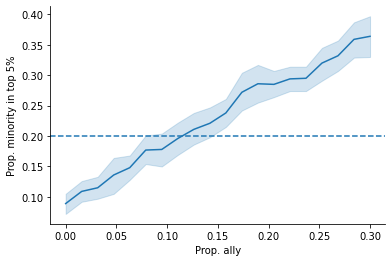

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

sns.lineplot(x=df_results.prop_ally, y=df_results.prop_min_top_k)
ax.set_xlabel("Prop. ally")
ax.set_ylabel("Prop. minority in top 5%")
ax.axhline(0.2, linestyle='--')

sns.despine()

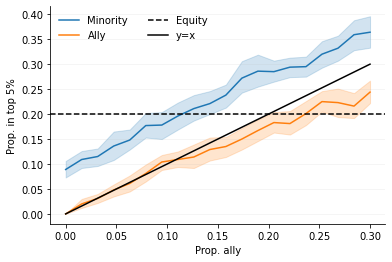

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

sns.lineplot(data=df_results, x='prop_ally', y='prop_min_top_k', label='Minority')
sns.lineplot(data=df_results, x='prop_ally', y='prop_ally_top_k', label='Ally')

ax.set_xlabel("Prop. ally")
ax.set_ylabel("Prop. in top 5%")
ax.axhline(0.2, linestyle='--', color='black', label='Equity')
ax.plot([0, 0.3], [0, 0.3], color='black', label='y=x')

ax.legend(frameon=False, ncol=2)

sns.despine()
ax.yaxis.grid(alpha=0.15)

Parameter sweep over the proportion of minorities who are "covert".

In [61]:
results_covert = []
beta_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4,
            0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 
            0.85, 0.9, 0.95, 1]




for fraction_covert in np.linspace(0, fm, 10):
    for i in range(10):
        g = DPAH2(
            N=N,
            fm=fm - fraction_covert,
            fa=fraction_covert, # "Allies" and "covert" are functionally the same
            d=0.0015,
            plo_M=3,
            plo_m=3,
            h_MM=h_MM,
            h_mm=h_mm,
            verbose=False,
            seed=i)
        
               
        for beta in beta_list:
            # Top k nodes to consider for inequity. k = N * beta
            k = int(N * beta)
            prop_top_k_covert, prop_top_k_minority = compute_inequity(g, k)
            results_covert.append((fraction_covert, beta, prop_top_k_covert, prop_top_k_minority))
            print((fraction_covert, beta, prop_top_k_covert, prop_top_k_minority))

(0.0, 0.05, 0.0, 0.06)
(0.0, 0.1, 0.0, 0.14)
(0.0, 0.15, 0.0, 0.16666666666666666)
(0.0, 0.2, 0.0, 0.165)
(0.0, 0.25, 0.0, 0.172)
(0.0, 0.3, 0.0, 0.18333333333333332)
(0.0, 0.35, 0.0, 0.2)
(0.0, 0.4, 0.0, 0.175)
(0.0, 0.45, 0.0, 0.15555555555555556)
(0.0, 0.5, 0.0, 0.14)
(0.0, 0.55, 0.0, 0.12727272727272726)
(0.0, 0.6, 0.0, 0.11666666666666667)
(0.0, 0.65, 0.0, 0.1076923076923077)
(0.0, 0.7, 0.0, 0.1)
(0.0, 0.75, 0.0, 0.09333333333333334)
(0.0, 0.8, 0.0, 0.0875)
(0.0, 0.85, 0.0, 0.08235294117647059)
(0.0, 0.9, 0.0, 0.1111111111111111)
(0.0, 0.95, 0.0, 0.15789473684210525)
(0.0, 1, 0.0, 0.2)
(0.0, 0.05, 0.0, 0.14)
(0.0, 0.1, 0.0, 0.17)
(0.0, 0.15, 0.0, 0.15333333333333332)
(0.0, 0.2, 0.0, 0.165)
(0.0, 0.25, 0.0, 0.168)
(0.0, 0.3, 0.0, 0.18666666666666668)
(0.0, 0.35, 0.0, 0.18857142857142858)
(0.0, 0.4, 0.0, 0.17)
(0.0, 0.45, 0.0, 0.1511111111111111)
(0.0, 0.5, 0.0, 0.136)
(0.0, 0.55, 0.0, 0.12363636363636364)
(0.0, 0.6, 0.0, 0.11333333333333333)
(0.0, 0.65, 0.0, 0.10461538461538461)
(0

(0.022222222222222223, 0.05, 0.04, 0.06)
(0.022222222222222223, 0.1, 0.03, 0.11)
(0.022222222222222223, 0.15, 0.02666666666666667, 0.12)
(0.022222222222222223, 0.2, 0.03, 0.135)
(0.022222222222222223, 0.25, 0.032, 0.136)
(0.022222222222222223, 0.3, 0.03, 0.14)
(0.022222222222222223, 0.35, 0.03142857142857143, 0.14857142857142858)
(0.022222222222222223, 0.4, 0.0275, 0.13)
(0.022222222222222223, 0.45, 0.024444444444444446, 0.11555555555555555)
(0.022222222222222223, 0.5, 0.022, 0.104)
(0.022222222222222223, 0.55, 0.02, 0.09454545454545454)
(0.022222222222222223, 0.6, 0.018333333333333333, 0.08666666666666667)
(0.022222222222222223, 0.65, 0.016923076923076923, 0.08)
(0.022222222222222223, 0.7, 0.015714285714285715, 0.07428571428571429)
(0.022222222222222223, 0.75, 0.014666666666666666, 0.06933333333333333)
(0.022222222222222223, 0.8, 0.01375, 0.065)
(0.022222222222222223, 0.85, 0.012941176470588235, 0.0611764705882353)
(0.022222222222222223, 0.9, 0.024444444444444446, 0.08666666666666667)

(0.044444444444444446, 0.05, 0.06, 0.1)
(0.044444444444444446, 0.1, 0.07, 0.1)
(0.044444444444444446, 0.15, 0.06, 0.10666666666666667)
(0.044444444444444446, 0.2, 0.055, 0.11)
(0.044444444444444446, 0.25, 0.048, 0.124)
(0.044444444444444446, 0.3, 0.05, 0.12333333333333334)
(0.044444444444444446, 0.35, 0.05142857142857143, 0.13714285714285715)
(0.044444444444444446, 0.4, 0.0475, 0.1325)
(0.044444444444444446, 0.45, 0.042222222222222223, 0.11777777777777777)
(0.044444444444444446, 0.5, 0.038, 0.106)
(0.044444444444444446, 0.55, 0.034545454545454546, 0.09636363636363636)
(0.044444444444444446, 0.6, 0.03166666666666667, 0.08833333333333333)
(0.044444444444444446, 0.65, 0.02923076923076923, 0.08153846153846153)
(0.044444444444444446, 0.7, 0.027142857142857142, 0.07571428571428572)
(0.044444444444444446, 0.75, 0.025333333333333333, 0.07066666666666667)
(0.044444444444444446, 0.8, 0.02375, 0.06625)
(0.044444444444444446, 0.85, 0.02235294117647059, 0.06235294117647059)
(0.044444444444444446, 0

(0.044444444444444446, 0.95, 0.04631578947368421, 0.11157894736842106)
(0.044444444444444446, 1, 0.044, 0.156)
(0.044444444444444446, 0.05, 0.02, 0.12)
(0.044444444444444446, 0.1, 0.02, 0.11)
(0.044444444444444446, 0.15, 0.02666666666666667, 0.11333333333333333)
(0.044444444444444446, 0.2, 0.03, 0.12)
(0.044444444444444446, 0.25, 0.032, 0.112)
(0.044444444444444446, 0.3, 0.03333333333333333, 0.11333333333333333)
(0.044444444444444446, 0.35, 0.03142857142857143, 0.12571428571428572)
(0.044444444444444446, 0.4, 0.0275, 0.11)
(0.044444444444444446, 0.45, 0.024444444444444446, 0.09777777777777778)
(0.044444444444444446, 0.5, 0.022, 0.088)
(0.044444444444444446, 0.55, 0.02, 0.08)
(0.044444444444444446, 0.6, 0.018333333333333333, 0.07333333333333333)
(0.044444444444444446, 0.65, 0.016923076923076923, 0.06769230769230769)
(0.044444444444444446, 0.7, 0.015714285714285715, 0.06285714285714286)
(0.044444444444444446, 0.75, 0.014666666666666666, 0.058666666666666666)
(0.044444444444444446, 0.8, 0

(0.06666666666666667, 0.05, 0.08, 0.14)
(0.06666666666666667, 0.1, 0.08, 0.12)
(0.06666666666666667, 0.15, 0.08, 0.11333333333333333)
(0.06666666666666667, 0.2, 0.065, 0.13)
(0.06666666666666667, 0.25, 0.076, 0.128)
(0.06666666666666667, 0.3, 0.08, 0.13666666666666666)
(0.06666666666666667, 0.35, 0.08285714285714285, 0.14)
(0.06666666666666667, 0.4, 0.0775, 0.135)
(0.06666666666666667, 0.45, 0.06888888888888889, 0.12)
(0.06666666666666667, 0.5, 0.062, 0.108)
(0.06666666666666667, 0.55, 0.056363636363636366, 0.09818181818181818)
(0.06666666666666667, 0.6, 0.051666666666666666, 0.09)
(0.06666666666666667, 0.65, 0.047692307692307694, 0.08307692307692308)
(0.06666666666666667, 0.7, 0.04428571428571428, 0.07714285714285714)
(0.06666666666666667, 0.75, 0.04133333333333333, 0.072)
(0.06666666666666667, 0.8, 0.03875, 0.0675)
(0.06666666666666667, 0.85, 0.036470588235294116, 0.06352941176470588)
(0.06666666666666667, 0.9, 0.051111111111111114, 0.06)
(0.06666666666666667, 0.95, 0.070526315789473

(0.08888888888888889, 0.95, 0.09368421052631579, 0.06421052631578947)
(0.08888888888888889, 1, 0.089, 0.111)
(0.08888888888888889, 0.05, 0.06, 0.08)
(0.08888888888888889, 0.1, 0.08, 0.07)
(0.08888888888888889, 0.15, 0.06, 0.08666666666666667)
(0.08888888888888889, 0.2, 0.08, 0.095)
(0.08888888888888889, 0.25, 0.072, 0.092)
(0.08888888888888889, 0.3, 0.07, 0.1)
(0.08888888888888889, 0.35, 0.08571428571428572, 0.09428571428571429)
(0.08888888888888889, 0.4, 0.075, 0.0875)
(0.08888888888888889, 0.45, 0.06666666666666667, 0.07777777777777778)
(0.08888888888888889, 0.5, 0.06, 0.07)
(0.08888888888888889, 0.55, 0.05454545454545454, 0.06363636363636363)
(0.08888888888888889, 0.6, 0.05, 0.058333333333333334)
(0.08888888888888889, 0.65, 0.046153846153846156, 0.05384615384615385)
(0.08888888888888889, 0.7, 0.04285714285714286, 0.05)
(0.08888888888888889, 0.75, 0.04, 0.04666666666666667)
(0.08888888888888889, 0.8, 0.0375, 0.04375)
(0.08888888888888889, 0.85, 0.03529411764705882, 0.0411764705882352

(0.11111111111111112, 0.05, 0.06, 0.06)
(0.11111111111111112, 0.1, 0.13, 0.07)
(0.11111111111111112, 0.15, 0.12, 0.06)
(0.11111111111111112, 0.2, 0.125, 0.08)
(0.11111111111111112, 0.25, 0.124, 0.068)
(0.11111111111111112, 0.3, 0.12, 0.08333333333333333)
(0.11111111111111112, 0.35, 0.12857142857142856, 0.07714285714285714)
(0.11111111111111112, 0.4, 0.1125, 0.075)
(0.11111111111111112, 0.45, 0.1, 0.06666666666666667)
(0.11111111111111112, 0.5, 0.09, 0.06)
(0.11111111111111112, 0.55, 0.08181818181818182, 0.05454545454545454)
(0.11111111111111112, 0.6, 0.075, 0.05)
(0.11111111111111112, 0.65, 0.06923076923076923, 0.046153846153846156)
(0.11111111111111112, 0.7, 0.06428571428571428, 0.04285714285714286)
(0.11111111111111112, 0.75, 0.06, 0.04)
(0.11111111111111112, 0.8, 0.05625, 0.0375)
(0.11111111111111112, 0.85, 0.052941176470588235, 0.03529411764705882)
(0.11111111111111112, 0.9, 0.07777777777777778, 0.03333333333333333)
(0.11111111111111112, 0.95, 0.1168421052631579, 0.0410526315789473

(0.13333333333333333, 0.05, 0.2, 0.04)
(0.13333333333333333, 0.1, 0.21, 0.05)
(0.13333333333333333, 0.15, 0.17333333333333334, 0.05333333333333334)
(0.13333333333333333, 0.2, 0.16, 0.055)
(0.13333333333333333, 0.25, 0.136, 0.06)
(0.13333333333333333, 0.3, 0.15, 0.05333333333333334)
(0.13333333333333333, 0.35, 0.14857142857142858, 0.05714285714285714)
(0.13333333333333333, 0.4, 0.13, 0.0525)
(0.13333333333333333, 0.45, 0.11555555555555555, 0.04666666666666667)
(0.13333333333333333, 0.5, 0.104, 0.042)
(0.13333333333333333, 0.55, 0.09454545454545454, 0.038181818181818185)
(0.13333333333333333, 0.6, 0.08666666666666667, 0.035)
(0.13333333333333333, 0.65, 0.08, 0.03230769230769231)
(0.13333333333333333, 0.7, 0.07428571428571429, 0.03)
(0.13333333333333333, 0.75, 0.06933333333333333, 0.028)
(0.13333333333333333, 0.8, 0.065, 0.02625)
(0.13333333333333333, 0.85, 0.0611764705882353, 0.024705882352941175)
(0.13333333333333333, 0.9, 0.08777777777777777, 0.023333333333333334)
(0.13333333333333333,

(0.13333333333333333, 0.95, 0.12421052631578948, 0.03368421052631579)
(0.13333333333333333, 1, 0.133, 0.067)
(0.13333333333333333, 0.05, 0.14, 0.06)
(0.13333333333333333, 0.1, 0.09, 0.07)
(0.13333333333333333, 0.15, 0.1, 0.06)
(0.13333333333333333, 0.2, 0.11, 0.07)
(0.13333333333333333, 0.25, 0.116, 0.064)
(0.13333333333333333, 0.3, 0.13666666666666666, 0.06333333333333334)
(0.13333333333333333, 0.35, 0.12857142857142856, 0.06571428571428571)
(0.13333333333333333, 0.4, 0.1125, 0.0575)
(0.13333333333333333, 0.45, 0.1, 0.051111111111111114)
(0.13333333333333333, 0.5, 0.09, 0.046)
(0.13333333333333333, 0.55, 0.08181818181818182, 0.04181818181818182)
(0.13333333333333333, 0.6, 0.075, 0.03833333333333333)
(0.13333333333333333, 0.65, 0.06923076923076923, 0.03538461538461538)
(0.13333333333333333, 0.7, 0.06428571428571428, 0.032857142857142856)
(0.13333333333333333, 0.75, 0.06, 0.030666666666666665)
(0.13333333333333333, 0.8, 0.05625, 0.02875)
(0.13333333333333333, 0.85, 0.052941176470588235,

(0.15555555555555556, 0.05, 0.22, 0.04)
(0.15555555555555556, 0.1, 0.2, 0.02)
(0.15555555555555556, 0.15, 0.19333333333333333, 0.02666666666666667)
(0.15555555555555556, 0.2, 0.17, 0.04)
(0.15555555555555556, 0.25, 0.168, 0.036)
(0.15555555555555556, 0.3, 0.16333333333333333, 0.03)
(0.15555555555555556, 0.35, 0.1657142857142857, 0.04)
(0.15555555555555556, 0.4, 0.16, 0.045)
(0.15555555555555556, 0.45, 0.14222222222222222, 0.04)
(0.15555555555555556, 0.5, 0.128, 0.036)
(0.15555555555555556, 0.55, 0.11636363636363636, 0.03272727272727273)
(0.15555555555555556, 0.6, 0.10666666666666667, 0.03)
(0.15555555555555556, 0.65, 0.09846153846153846, 0.027692307692307693)
(0.15555555555555556, 0.7, 0.09142857142857143, 0.025714285714285714)
(0.15555555555555556, 0.75, 0.08533333333333333, 0.024)
(0.15555555555555556, 0.8, 0.08, 0.0225)
(0.15555555555555556, 0.85, 0.07529411764705882, 0.021176470588235293)
(0.15555555555555556, 0.9, 0.09111111111111111, 0.02)
(0.15555555555555556, 0.95, 0.1389473684

(0.17777777777777778, 0.05, 0.26, 0.02)
(0.17777777777777778, 0.1, 0.17, 0.03)
(0.17777777777777778, 0.15, 0.16, 0.04)
(0.17777777777777778, 0.2, 0.155, 0.04)
(0.17777777777777778, 0.25, 0.148, 0.032)
(0.17777777777777778, 0.3, 0.15, 0.03)
(0.17777777777777778, 0.35, 0.16, 0.025714285714285714)
(0.17777777777777778, 0.4, 0.1575, 0.0225)
(0.17777777777777778, 0.45, 0.14, 0.02)
(0.17777777777777778, 0.5, 0.126, 0.018)
(0.17777777777777778, 0.55, 0.11454545454545455, 0.016363636363636365)
(0.17777777777777778, 0.6, 0.105, 0.015)
(0.17777777777777778, 0.65, 0.09692307692307692, 0.013846153846153847)
(0.17777777777777778, 0.7, 0.09, 0.012857142857142857)
(0.17777777777777778, 0.75, 0.084, 0.012)
(0.17777777777777778, 0.8, 0.07875, 0.01125)
(0.17777777777777778, 0.85, 0.07411764705882352, 0.010588235294117647)
(0.17777777777777778, 0.9, 0.10111111111111111, 0.01)
(0.17777777777777778, 0.95, 0.14842105263157895, 0.009473684210526316)
(0.17777777777777778, 1, 0.178, 0.022)
(0.17777777777777778

(0.2, 0.95, 0.15789473684210525, 0.0)
(0.2, 1, 0.2, 0.0)
(0.2, 0.05, 0.16, 0.0)
(0.2, 0.1, 0.17, 0.0)
(0.2, 0.15, 0.17333333333333334, 0.0)
(0.2, 0.2, 0.2, 0.0)
(0.2, 0.25, 0.204, 0.0)
(0.2, 0.3, 0.22333333333333333, 0.0)
(0.2, 0.35, 0.21428571428571427, 0.0)
(0.2, 0.4, 0.2075, 0.0)
(0.2, 0.45, 0.18444444444444444, 0.0)
(0.2, 0.5, 0.166, 0.0)
(0.2, 0.55, 0.1509090909090909, 0.0)
(0.2, 0.6, 0.13833333333333334, 0.0)
(0.2, 0.65, 0.1276923076923077, 0.0)
(0.2, 0.7, 0.11857142857142858, 0.0)
(0.2, 0.75, 0.11066666666666666, 0.0)
(0.2, 0.8, 0.10375, 0.0)
(0.2, 0.85, 0.0976470588235294, 0.0)
(0.2, 0.9, 0.1111111111111111, 0.0)
(0.2, 0.95, 0.15789473684210525, 0.0)
(0.2, 1, 0.2, 0.0)
(0.2, 0.05, 0.26, 0.0)
(0.2, 0.1, 0.24, 0.0)
(0.2, 0.15, 0.23333333333333334, 0.0)
(0.2, 0.2, 0.215, 0.0)
(0.2, 0.25, 0.192, 0.0)
(0.2, 0.3, 0.19, 0.0)
(0.2, 0.35, 0.2, 0.0)
(0.2, 0.4, 0.19, 0.0)
(0.2, 0.45, 0.1688888888888889, 0.0)
(0.2, 0.5, 0.152, 0.0)
(0.2, 0.55, 0.13818181818181818, 0.0)
(0.2, 0.6, 0.1266666

In [62]:
df_results_covert = pd.DataFrame(results_covert, columns=['prop_covert', 'beta', 'prop_covert_top_k', 'prop_overt_top_k'])
df_results_covert['prop_covert_rescaled'] = df_results_covert['prop_covert'] / df_results_covert['prop_covert'].max()
df_results_covert['prop_all_minorities_top_k'] = df_results_covert['prop_covert_top_k'] + df_results_covert['prop_overt_top_k']

df_results_covert

,prop_covert,beta,prop_covert_top_k,prop_overt_top_k,prop_covert_rescaled,prop_all_minorities_top_k
0,0.0,0.05,0.000000,0.060000,0.0,0.060000
1,0.0,0.10,0.000000,0.140000,0.0,0.140000
2,0.0,0.15,0.000000,0.166667,0.0,0.166667
3,0.0,0.20,0.000000,0.165000,0.0,0.165000
4,0.0,0.25,0.000000,0.172000,0.0,0.172000
...,...,...,...,...,...,...
1995,0.2,0.80,0.091250,0.000000,1.0,0.091250
1996,0.2,0.85,0.085882,0.000000,1.0,0.085882
1997,0.2,0.90,0.111111,0.000000,1.0,0.111111
1998,0.2,0.95,0.157895,0.000000,1.0,0.157895


In [63]:

df_results_covert.to_csv("group_A/results/covert_sweep_per_beta.csv", index=False)

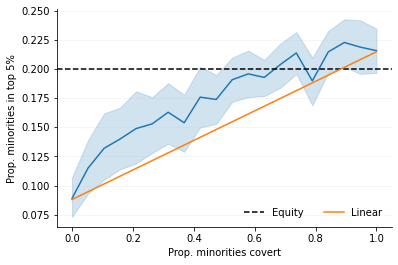

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

sns.lineplot(data=df_results_covert, x='prop_covert_rescaled', y='prop_all_minorities_top_k')

ax.set_xlabel("Prop. minorities covert")
ax.set_ylabel("Prop. minorities in top 5%")
ax.axhline(0.2, linestyle='--', color='black', label='Equity')
ax.plot([0, 1], [0.088, 0.215], label='Linear')

ax.legend(frameon=False, ncol=2, loc='lower right')

sns.despine()
ax.yaxis.grid(alpha=0.15)
